# <strong> Machine Learning</strong>


### Import Libraries and Loading the Data


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Define the ticker symbol for Air New Zealand

ticker = 'AIR.NZ'

# Fetch historical market data (2020-01-01 to 2024-01-01)
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Display the first few rows of the data
print(data.head())

                Open      High       Low     Close  Adj Close   Volume
Date                                                                  
2020-01-03  1.788932  1.868577  1.788932  1.868577   1.675070   541348
2020-01-06  1.837944  1.856324  1.813438  1.813438   1.625641   593018
2020-01-07  1.837944  1.837944  1.782806  1.813438   1.625641   516170
2020-01-08  1.801185  1.819565  1.776679  1.776679   1.592689  1093079
2020-01-09  1.795059  1.813438  1.791996  1.813438   1.625641   412331


In [ ]:
# Basic Information about data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2020-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1000 non-null   float64
 1   High       1000 non-null   float64
 2   Low        1000 non-null   float64
 3   Close      1000 non-null   float64
 4   Adj Close  1000 non-null   float64
 5   Volume     1000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 54.7 KB
None


In [ ]:
#  Summary Statistics
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,0.884141,0.894946,0.872067,0.881998,0.794484,2.729253e+06
std,0.227310,0.229699,0.224445,0.226083,0.199760,3.079251e+06
min,0.514624,0.523814,0.490118,0.490118,0.439362,0.000000e+00
25%,0.765000,0.775000,0.756620,0.765000,0.690260,1.078490e+06
50%,0.822974,0.839328,0.813290,0.820948,0.737305,1.760386e+06
75%,0.971047,0.983300,0.961857,0.974110,0.873233,3.109135e+06
max,1.868577,1.868577,1.847134,1.868577,1.675070,2.816131e+07


<function matplotlib.pyplot.show(close=None, block=None)>

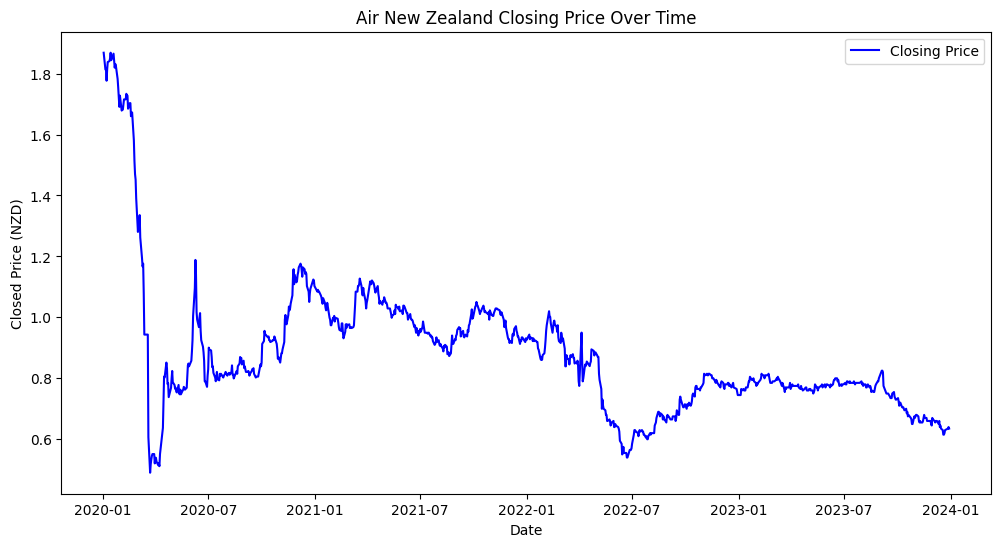

In [ ]:
# Plot the closing price over time
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.title('Air New Zealand Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closed Price (NZD)')
plt.legend()
plt.show

### Data Cleaning and Preprocessing

In [ ]:
# Check for missing values
print(data.isnull().sum())


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<strong> Feature Engineering </strong> <br>
Moving averages, like the 10-day or 50-day, help smooth out stock price fluctuations and highlight trends. For Air New Zealand's stock, these averages can show general trends and help identify potential buy or sell signals by filtering out short-term volatility.

In [ ]:
# Creating Additional Features (Moving averages)
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close']. rolling(window=50).mean()

In [ ]:
# Drop any remaining NaN values after feature creation
data = data.dropna()

# Display the updated data
print(data.head())

                Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2020-03-13  1.029249  1.035375  0.943478  0.943478   0.845773  7566216   
2020-03-16  0.943478  0.943478  0.943478  0.943478   0.845773        0   
2020-03-17  0.943478  0.943478  0.943478  0.943478   0.845773        0   
2020-03-18  0.943478  0.943478  0.943478  0.943478   0.845773        0   
2020-03-19  0.943478  0.943478  0.943478  0.943478   0.845773        0   

               MA_10     MA_50  
Date                            
2020-03-13  1.205691  1.625294  
2020-03-16  1.171996  1.606792  
2020-03-17  1.134011  1.589393  
2020-03-18  1.098784  1.571994  
2020-03-19  1.059575  1.555330  


### Feature Selection and Data Splotting

For Machine Learning we are going to use the feature of  Moving Averages and the Close Price (NZD) as a target

In [ ]:
# Select features and target
features = data[['MA_10', 'MA_50']]
target = data['Close']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Display the shapes of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(760, 2) (191, 2) (760,) (191,)


### Machine Learning Models

- Simple linear Regression
- K-Nearest Neighbour (KNN)
- Support Vector Machine (SVM)
- Decision Tree
- Random Forest

#### <strong> Baseline Model (Simple Linear Regression)

Mean Absolute Error: 0.015205193833087164
Mean Squared Error: 0.00035013553075741524
Root Mean Squared Error: 0.018711908795134055
R^2 Score: 0.8805714994426681


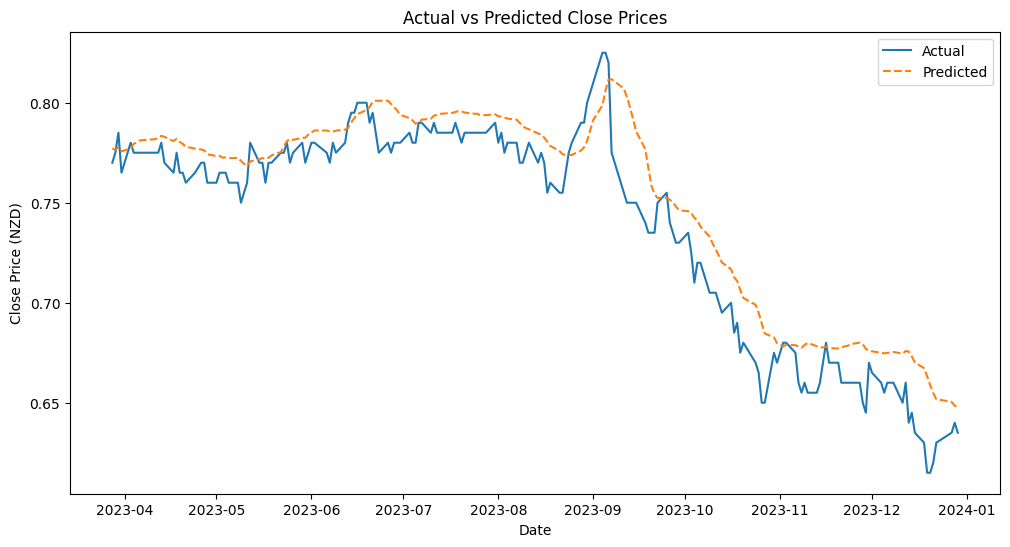

In [ ]:
# Initialize and train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (NZD)')
plt.legend()
plt.show()

#### <strong> K-Nearest Neighbours

Mean Absolute Error: 0.02100830034435732
Mean Squared Error: 0.0007884503795278602
Root Mean Squared Error: 0.028079358602501235
R^2 Score: 0.7310657207876714


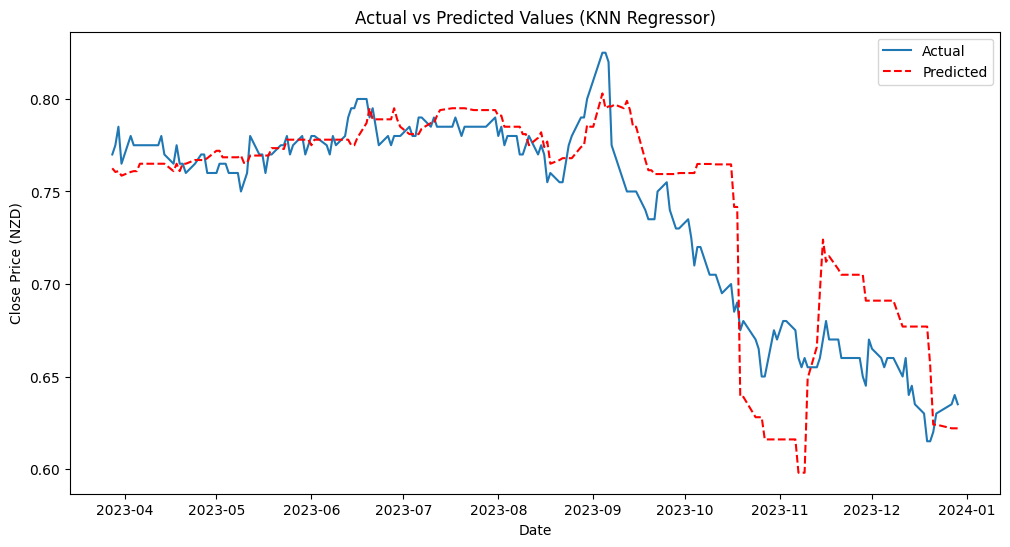

In [ ]:
# Initialize the KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--', color='red')
plt.title('Actual vs Predicted Values (KNN Regressor)')
plt.xlabel('Date')
plt.ylabel('Close Price (NZD)')
plt.legend()
plt.show()

#### <strong> Suppor Vector Machine (SVM)

Mean Absolute Error: 0.02612554496402897
Mean Squared Error: 0.000929687064214473
Root Mean Squared Error: 0.03049077014793941
R^2 Score: 0.6828909884509601


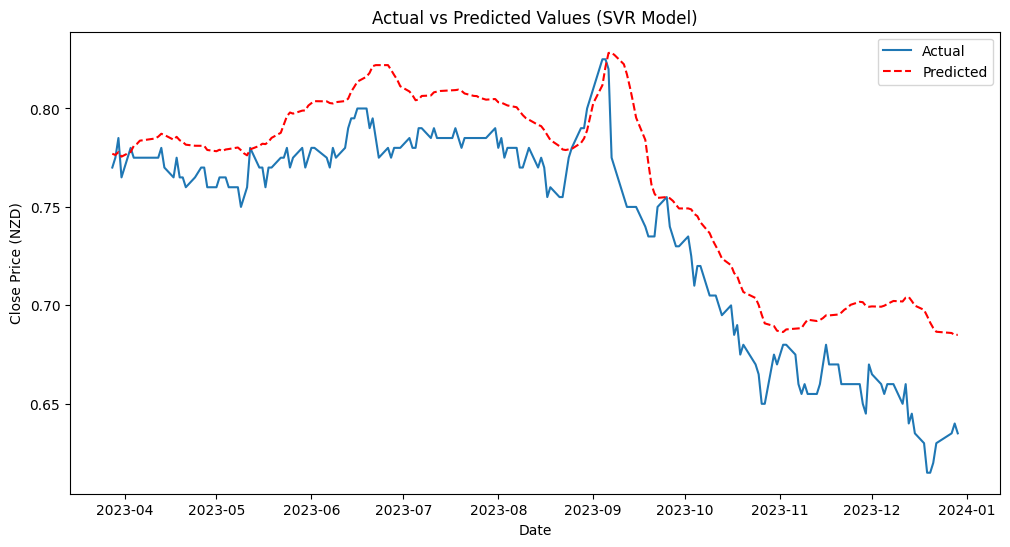

In [ ]:
# Create an SVM Model for regression using SVR with an RBF kernel
model = SVR(kernel='rbf')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--', color='red')
plt.title('Actual vs Predicted Values (SVR Model)')
plt.xlabel('Date')
plt.ylabel('Close Price (NZD)')
plt.legend()
plt.show()

#### <strong> Decision Tree

Mean Absolute Error: 0.02311971955274412
Mean Squared Error: 0.0010068075064407493
Root Mean Squared Error: 0.03173023016684167
R^2 Score: 0.6565858066904042


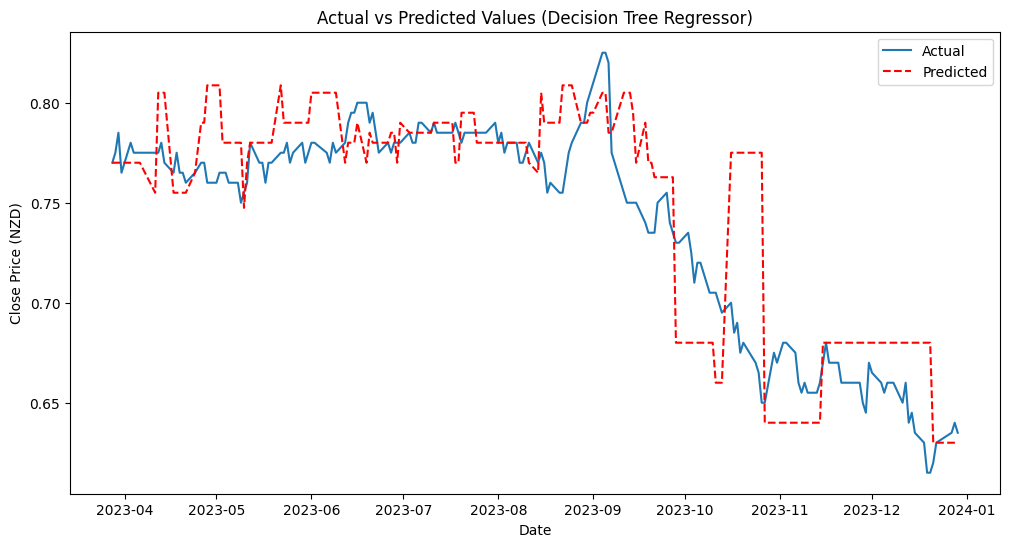

In [ ]:
# Initialize the decision tree model
model = DecisionTreeRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--', color='red')
plt.title('Actual vs Predicted Values (Decision Tree Regressor)')
plt.xlabel('Date')
plt.ylabel('Close Price (NZD)')
plt.legend()
plt.show()


#### <strong> Random Forest


Mean Absolute Error: 0.015700304314728183
Mean Squared Error: 0.0004384146050160151
Root Mean Squared Error: 0.02093835249049015
R^2 Score: 0.8504601952671473


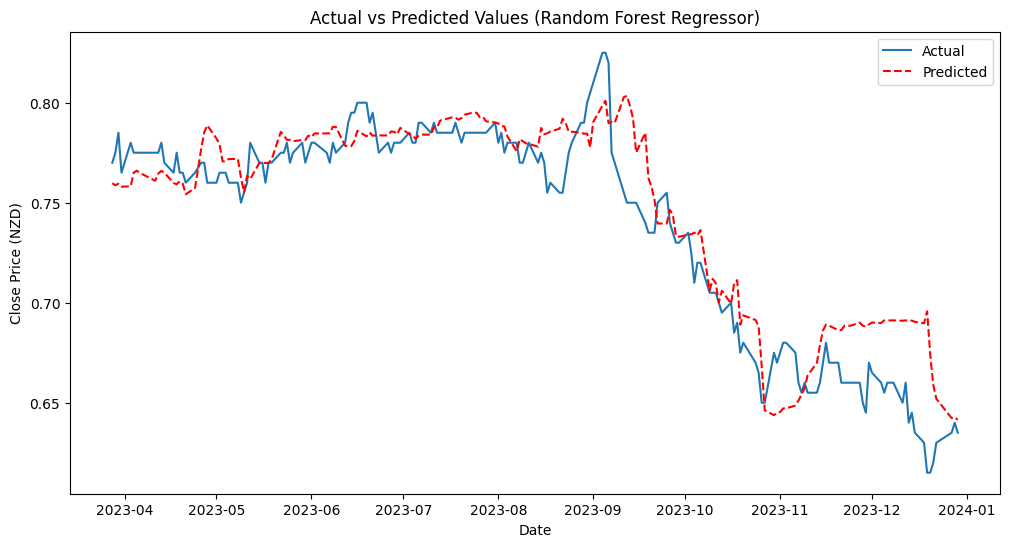

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--', color='red')
plt.title('Actual vs Predicted Values (Random Forest Regressor)')
plt.xlabel('Date')
plt.ylabel('Close Price (NZD)')
plt.legend()
plt.show()

### Visualization

In [ ]:
# Data
models = ['Linear Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest']
mae = [0.015205193833087164, 0.02100830034435732, 0.02612554496402897, 0.025632804913046474, 0.015700304314728183]
mse = [0.00035013553075741524, 0.0007884503795278602, 0.000929687064214473, 0.0010688493010079126, 0.0004384146050160151]
rmse = [0.018711908795134055, 0.028079358602501235, 0.03049077014793941, 0.03269326078885238, 0.02093835249049015]
r2 = [0.8805714994426681, 0.7310657207876714, 0.6828909884509601, 0.6354238341221992, 0.8504601952671473]

# Bar width
bar_width = 0.2
index = np.arange(len(models))


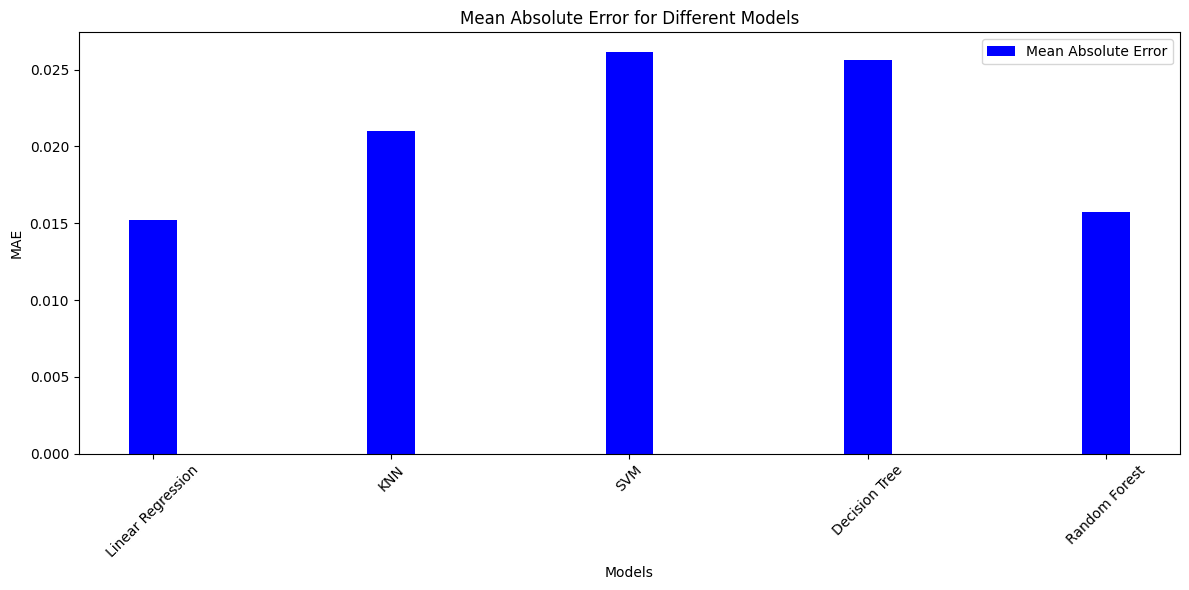

In [ ]:
# Plot for Mean Absolute Error
plt.figure(figsize=(12, 6))
plt.bar(index, mae, bar_width, color='b', label='Mean Absolute Error')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Mean Absolute Error for Different Models')
plt.xticks(index, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


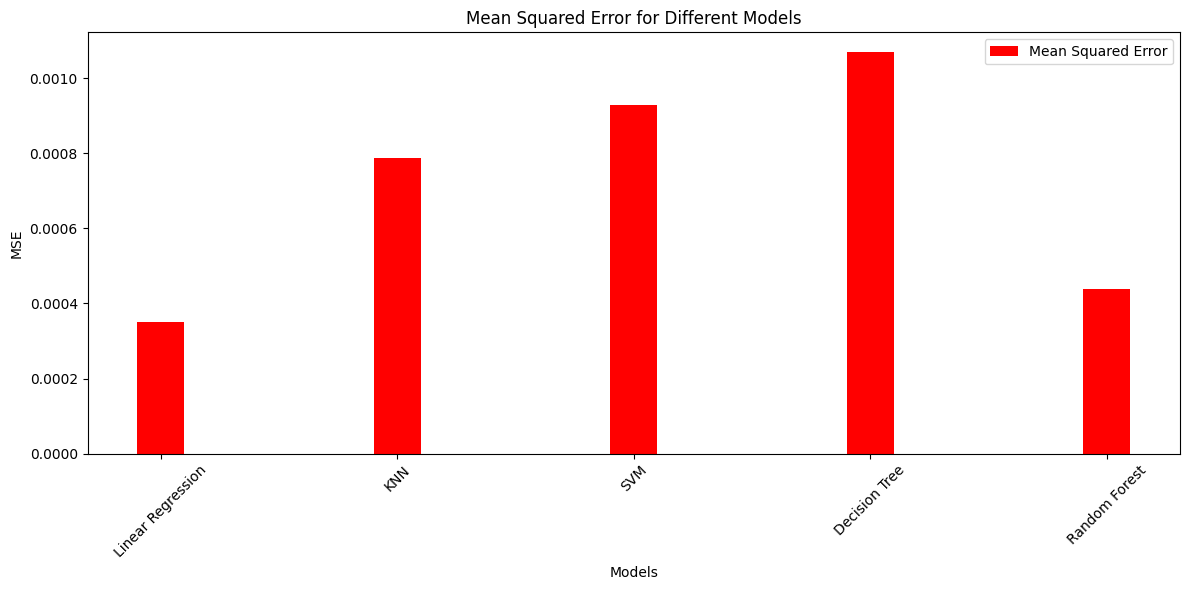

In [ ]:
# Plot for Mean Squared Error
plt.figure(figsize=(12, 6))
plt.bar(index, mse, bar_width, color='r', label='Mean Squared Error')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Squared Error for Different Models')
plt.xticks(index, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

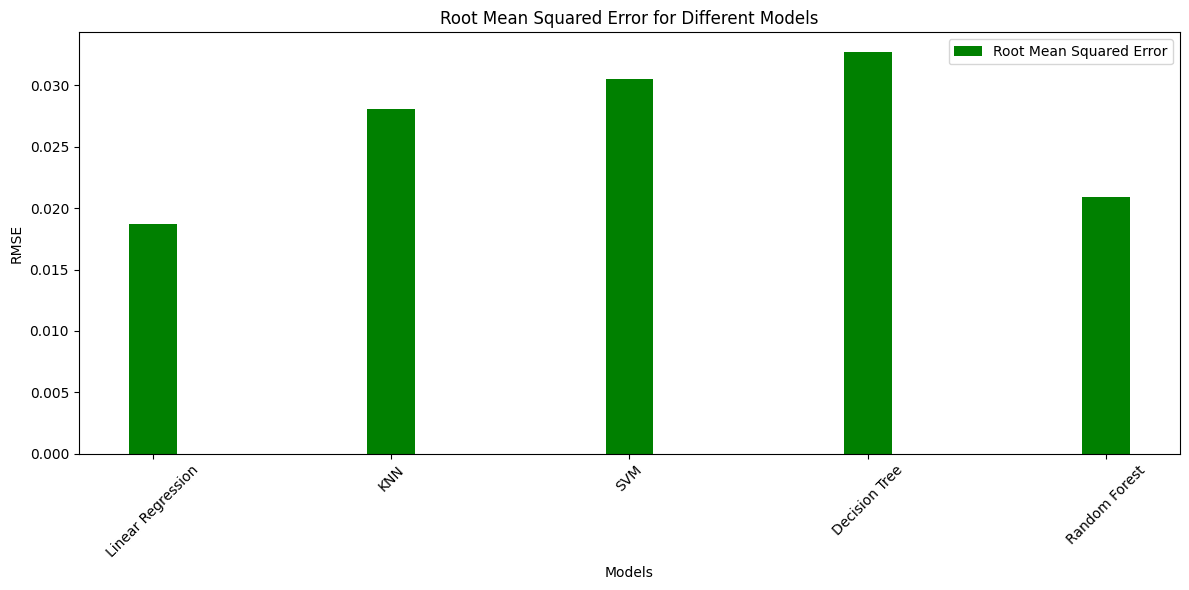

In [ ]:
# Plot for Root Mean Squared Error
plt.figure(figsize=(12, 6))
plt.bar(index, rmse, bar_width, color='g', label='Root Mean Squared Error')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error for Different Models')
plt.xticks(index, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

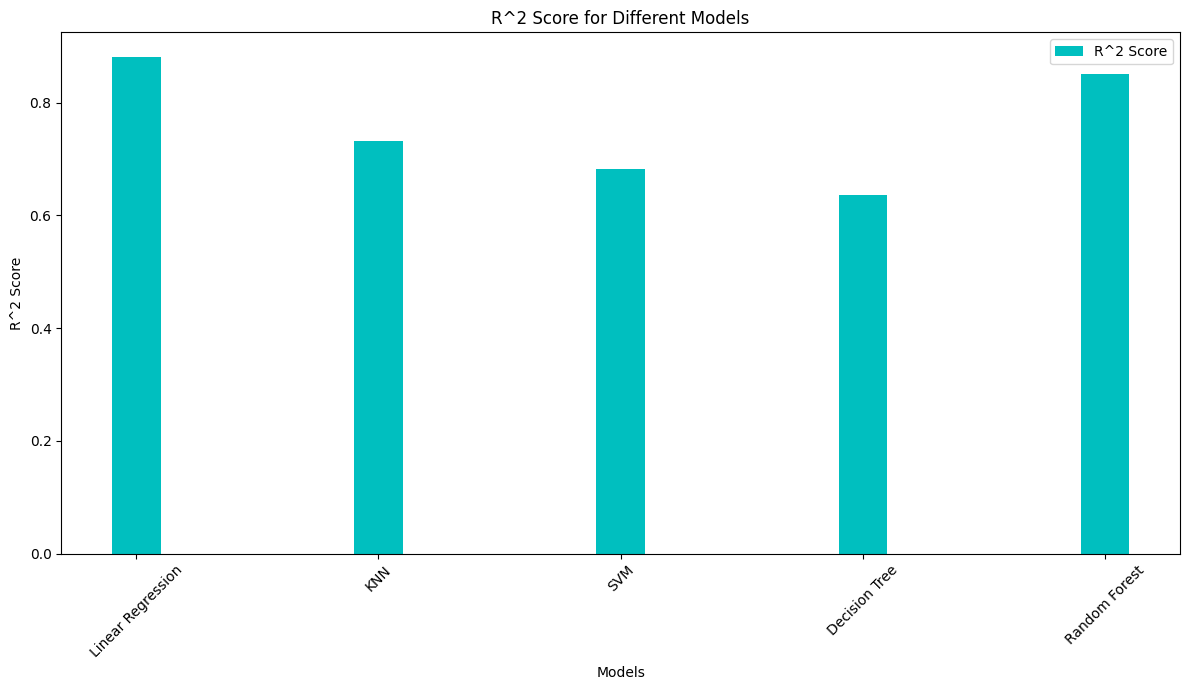

In [ ]:
# Plot for R^2 Score
plt.figure(figsize=(12, 7))
plt.bar(index, r2, bar_width, color='c', label='R^2 Score')
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.title('R^2 Score for Different Models')
plt.xticks(index, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()